# Sales Analysis 

## Import necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Merge the 12 months of Sales Data into a single CSV file

In [60]:
df = pd.read_csv("./Sales_Data\\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [61]:
files = [file for file in os.listdir("./Sales_Data")]

all_month_df = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data\\" + file)
    all_month_df = pd.concat([all_month_df, df])

all_month_df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [ ]:
all_month_df.to_csv("./Output\\all_data.csv", index=False)

### Read data in the newly merged DataFrame

In [2]:
df = pd.read_csv("./Output\\all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## What was the best month for sales? How much was earned that month?

In [5]:
print("Data Frame's shape: ", df.shape)
print("Data Frame's information", df.info())

Data Frame's shape:  (186850, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
Data Frame's information None


### Dealing with null and na values

In [6]:
print("Null values: ", df.isnull().sum())
print("-----")
print("NaN values: ", df.isna().sum())

Null values:  Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
-----
NaN values:  Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [7]:
df1 = df.dropna().reset_index(drop='index')
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Dealing with inconsistent records

In [8]:
print("unique values in Quantity Ordered column", df1['Quantity Ordered'].unique())
print("unique values in Price Each column", df1['Price Each'].unique())

unique values in Quantity Ordered column ['2' '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']
unique values in Price Each column ['11.95' '99.99' '600' '11.99' '1700' '14.95' '389.99' '3.84' '150' '2.99'
 '700' '300' '149.99' '109.99' '600.0' '999.99' '400' '379.99'
 'Price Each' '700.0' '1700.0' '150.0' '300.0' '400.0']


In [9]:
deleted_rows = df1[df1['Quantity Ordered'] == 'Quantity Ordered'].index.to_list()
df1 = df1.drop(deleted_rows, axis = 0)

In [10]:
df1['Quantity Ordered'] = df1['Quantity Ordered'].astype(int)
df1['Price Each'] = df1['Price Each'].astype(float)

### Add column Sales and column Month

In [11]:
df1['Sales'] = df1['Quantity Ordered'] * df1['Price Each']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [12]:
# df1['Month'] = df1['Order Date'].str[0:2].astype(str)
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%m/%d/%y %H:%M')
df1['Month'] = df1['Order Date'].dt.month

### Group by and solve the question 1

In [13]:
monthly_group = df1.groupby(df1['Month'])[['Quantity Ordered','Price Each','Sales']].sum().reset_index()
monthly_group

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


In [14]:
monthly_group.loc[monthly_group['Sales'].idxmax()]

Month                    12.00
Quantity Ordered      28114.00
Price Each          4588415.41
Sales               4613443.34
Name: 11, dtype: float64

### Plot bar chart

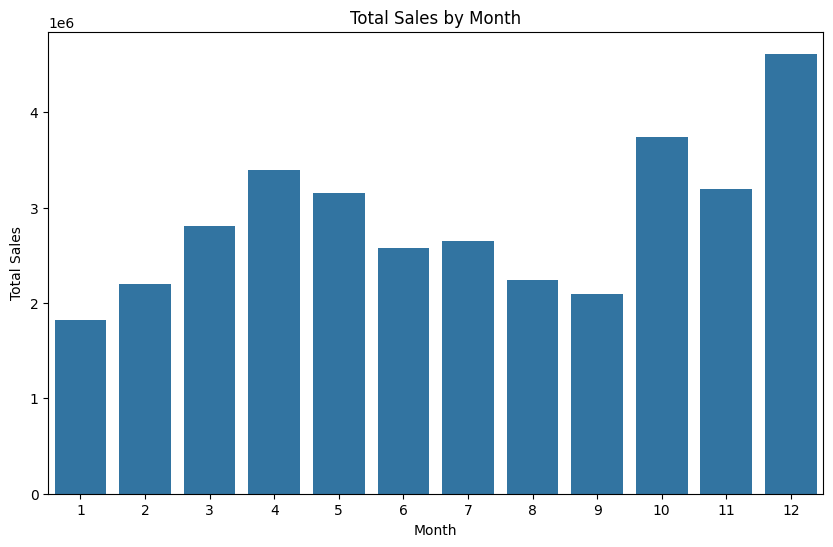

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_group, x='Month', y='Sales')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

## What city had the highest number of sales

In [16]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [17]:
# Function to extract city name
def get_city(address):
    return address.split(',')[1].strip()

# Apply the function to the 'Purchase Address' column
df1['City'] = df1['Purchase Address'].apply(get_city)

In [18]:
city_group = df1.groupby(df1['City'])[['Quantity Ordered','Price Each','Sales']].sum().reset_index()
city_group

,City,Quantity Ordered,Price Each,Sales
0,Atlanta,16602,2779908.20,2795498.58
1,Austin,11153,1809873.61,1819581.75
2,Boston,22528,3637409.77,3661642.01
3,Dallas,16730,2752627.82,2767975.40
4,Los Angeles,33289,5421435.23,5452570.80
5,New York City,27932,4635370.83,4664317.43
6,Portland,14053,2307747.47,2320490.61
7,San Francisco,50239,8211461.74,8262203.91
8,Seattle,16553,2733296.01,2747755.48


In [19]:
city_group.loc[city_group['Sales'].idxmax()]

City                San Francisco
Quantity Ordered            50239
Price Each             8211461.74
Sales                  8262203.91
Name: 7, dtype: object

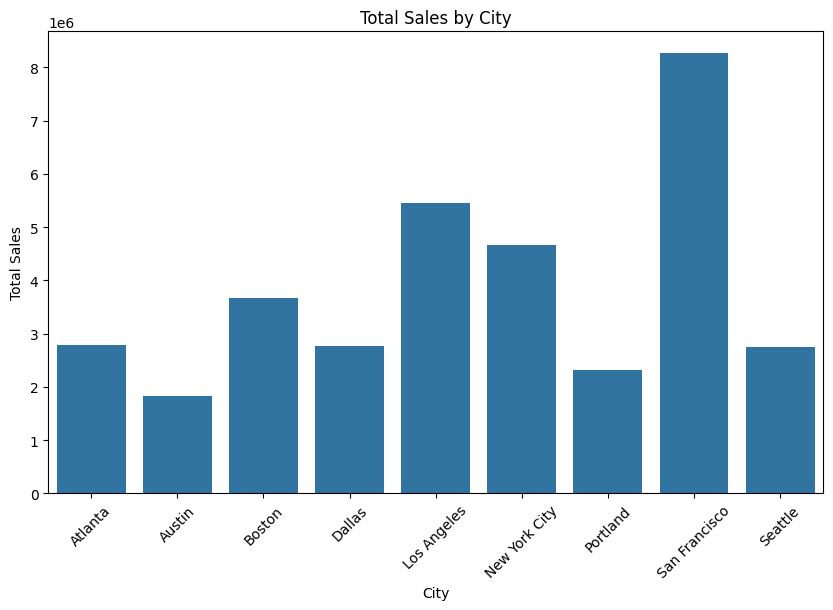

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=city_group, x='City', y='Sales')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
df1['Hour'] = df1['Order Date'].dt.hour
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9


In [22]:
hour_group = df1.groupby('Hour').size().reset_index(name= 'Total Quantity Sold')

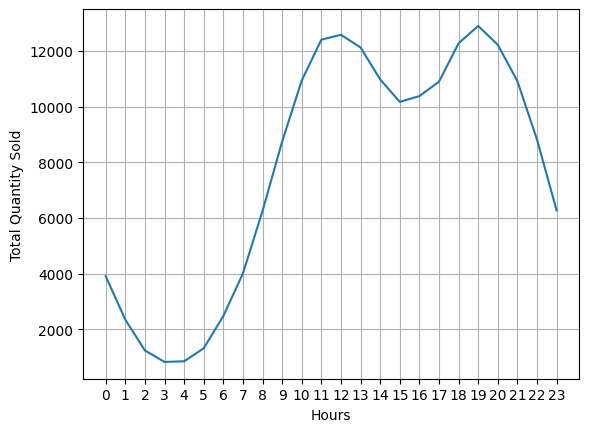

In [23]:
plt.plot(hour_group['Hour'], hour_group['Total Quantity Sold'])
plt.xticks(hour_group['Hour'])
plt.xlabel("Hours")
plt.ylabel("Total Quantity Sold")
plt.grid(True)

==> Recommend displaying advertisements from 11 AM to 12 PM and from 6 PM to 7 PM  

## What products sold the most ?

In [24]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9


In [25]:
product_df = df1.groupby('Product')['Quantity Ordered'].sum().reset_index()

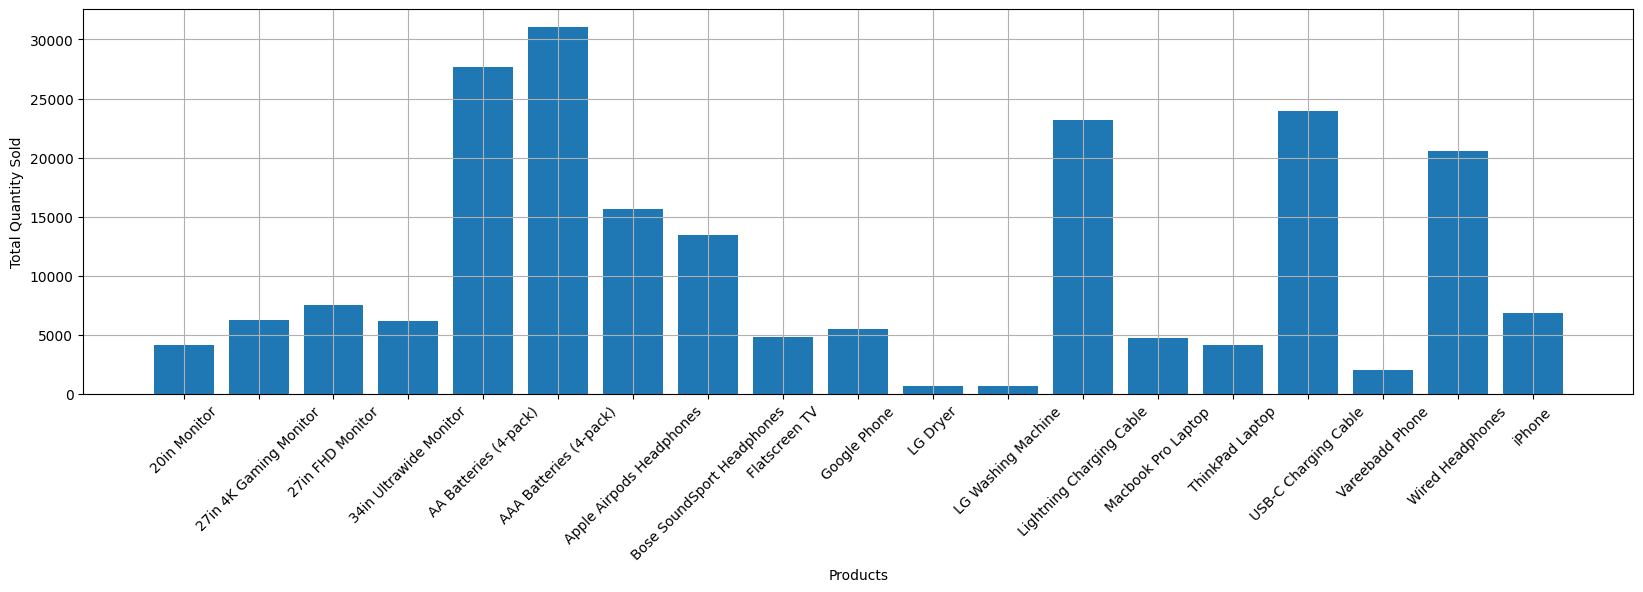

In [37]:
plt.figure(figsize=(20,5))
plt.bar(x = product_df['Product'], height = product_df['Quantity Ordered'])
plt.xlabel('Products')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14288\4091844799.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_df['Product'], rotation='vertical', size=8)
C:\Users\USER\AppData\Local\Temp\ipykernel_14288\4091844799.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


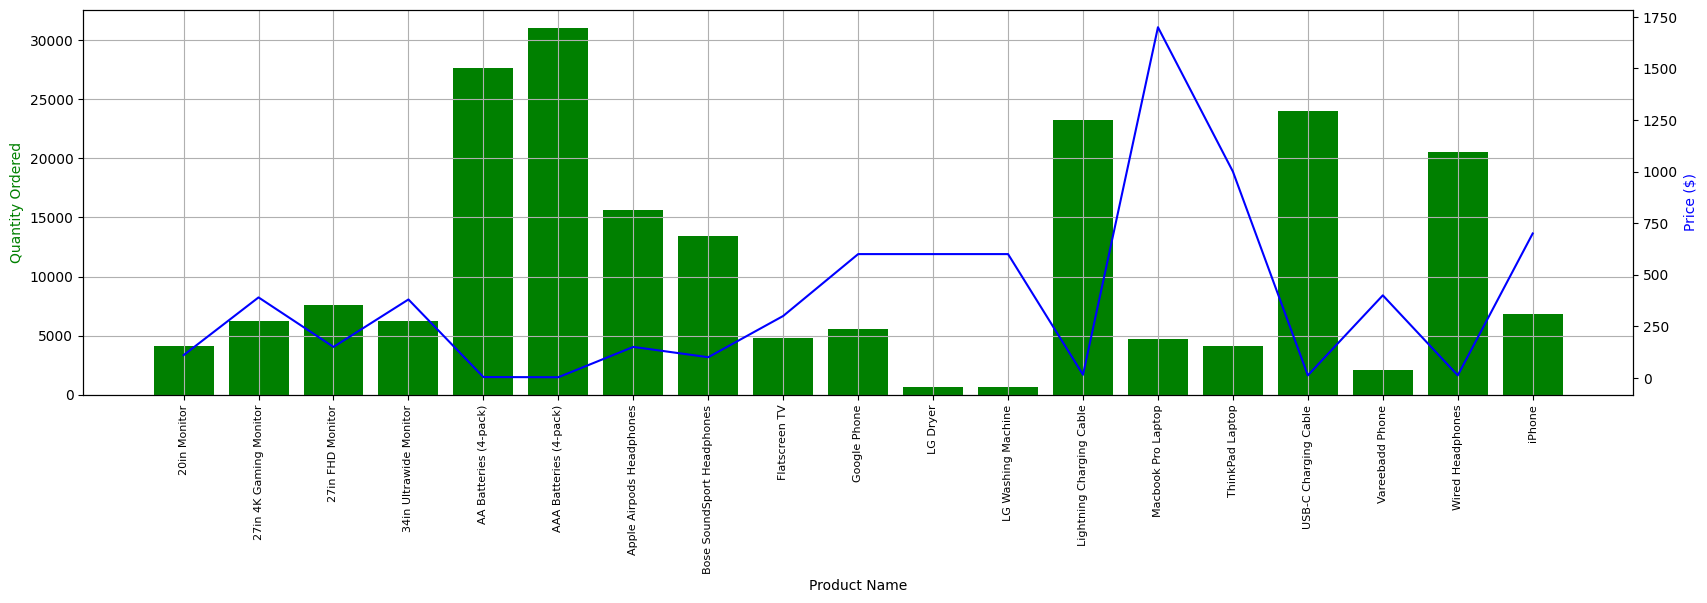

In [43]:
prices = df1.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots(figsize=(20,5))

ax2 = ax1.twinx()
ax1.bar(product_df['Product'], product_df['Quantity Ordered'], color='g')
ax2.plot(product_df['Product'], prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product_df['Product'], rotation='vertical', size=8)
ax1.grid(True)

fig.show()

==> The most product sold is AAA Batteries (4-pack). Moreover, the graph shows us that there is a pattern that less expensive products are more likely to be bought than expensive ones

## What products are most often sold together?

### Apply Apriori Algorithm

In [44]:
from mlxtend.frequent_patterns import apriori, association_rules

In [48]:
basket = df1.groupby(['Order ID', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order ID')

# Convert to binary values
basket = basket.map(lambda x: 1 if x > 0 else 0)

# Apply the Apriori algorithm with minimum support of 80%
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the results
frequent_itemsets

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.022966,(20in Monitor)
1,0.034886,(27in 4K Gaming Monitor)
2,0.042020,(27in FHD Monitor)
3,0.034600,(34in Ultrawide Monitor)
4,0.115122,(AA Batteries (4-pack))
5,0.115408,(AAA Batteries (4-pack))
6,0.087005,(Apple Airpods Headphones)
7,0.074525,(Bose SoundSport Headphones)
8,0.026867,(Flatscreen TV)
9,0.030946,(Google Phone)


In [49]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(USB-C Charging Cable),(Google Phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374,0.366521
1,(Google Phone),(USB-C Charging Cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865,0.331900
2,(iPhone),(Lightning Charging Cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370,0.188077
3,(Lightning Charging Cable),(iPhone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880,0.205782


### From scratch

In [50]:
duplicated_df = df1[df1['Order ID'].duplicated(keep = False)]
duplicated_df['Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_14288\1356089849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [51]:
duplicated_df = duplicated_df[['Order ID','Grouped']].drop_duplicates()
duplicated_df

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [52]:
from itertools import combinations
from collections import Counter

In [53]:
count = Counter()
for row in duplicated_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

==> The results are the same with Apriori Algorithm' s results